##  Matplotlib
Matplotlib est une bibliothèque Python de visualisation de données qui permet de créer des graphiques statiques, animés et interactifs. Elle est largement utilisée dans la science des données pour explorer et comprendre les données.

**Pourquoi utiliser Matplotlib ?**
* **Large variété de graphiques :** Matplotlib supporte un large éventail de graphiques (courbes, histogrammes, scatter plots, barres, etc.).
* **Personnalisation avancée :** Vous pouvez personnaliser presque tous les aspects des graphiques.
* **Intégration avec d'autres bibliothèques :** Matplotlib s'intègre bien avec des bibliothèques comme NumPy et Pandas.

## 1. Installation et Importation
Pour commencer à utiliser Matplotlib, assurez-vous que la bibliothèque est installée. Si elle ne l'est pas, vous pouvez l'installer via pip :

In [466]:
pip install matplotlib

In [467]:
# importation 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

## 2. Structure de base d'un graphique Matplotlib
Un graphique Matplotlib est construit autour de plusieurs composants de base :

* **Figure :** La fenêtre ou la page qui contient le graphique.
* **Axes :** Une zone d'un graphique où les données sont tracées.
* **Plot :** Le graphique lui-même (courbe, barre, scatter, etc.).
Titre, légendes, labels : Les éléments textuels pour décrire le graphique.

In [468]:
# Chargement du dataset Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Ajout de la colonne des espèces
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Affichage des premières lignes du DataFrame
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


## 3. Types de Graphiques avec Matplotlib
1. **Courbe Simple (Line Plot)**
Le line plot est utilisé pour visualiser des séries temporelles ou la relation entre deux variables numériques.

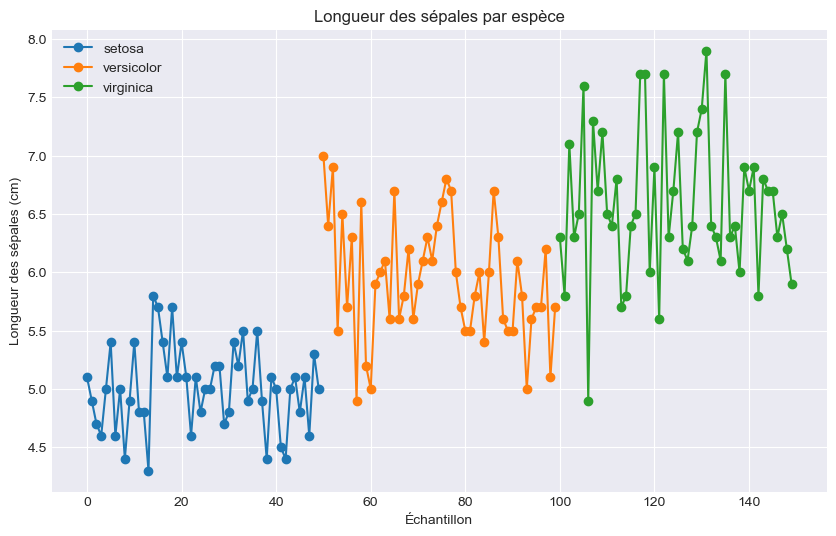

In [469]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.plot(subset['sepal length (cm)'], marker='o', linestyle='-', label=species)

plt.title('Longueur des sépales par espèce')
plt.xlabel('Échantillon')
plt.ylabel('Longueur des sépales (cm)')
plt.legend()
plt.grid(True)
plt.show()


**2. Histogramme :**
L'histogramme est utilisé pour visualiser la distribution des données numériques.

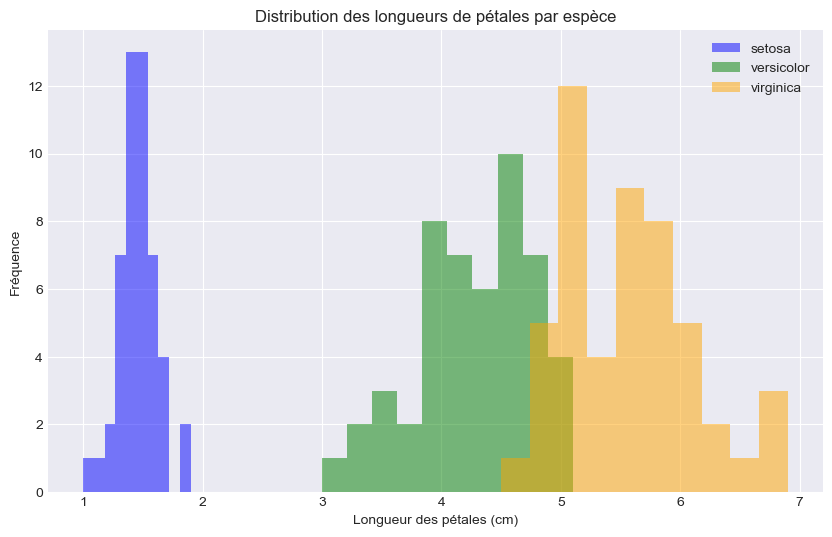

In [470]:
plt.figure(figsize=(10, 6))
species_colors = {'setosa': 'blue', 'versicolor': 'green', 'virginica': 'orange'}

for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.hist(subset['petal length (cm)'], bins=10, alpha=0.5, label=species, color=species_colors[species])

plt.title('Distribution des longueurs de pétales par espèce')
plt.xlabel('Longueur des pétales (cm)')
plt.ylabel('Fréquence')
plt.legend()
plt.show()


**3. Scatter Plot :**
Le scatter plot est utilisé pour visualiser la relation entre deux variables numériques.

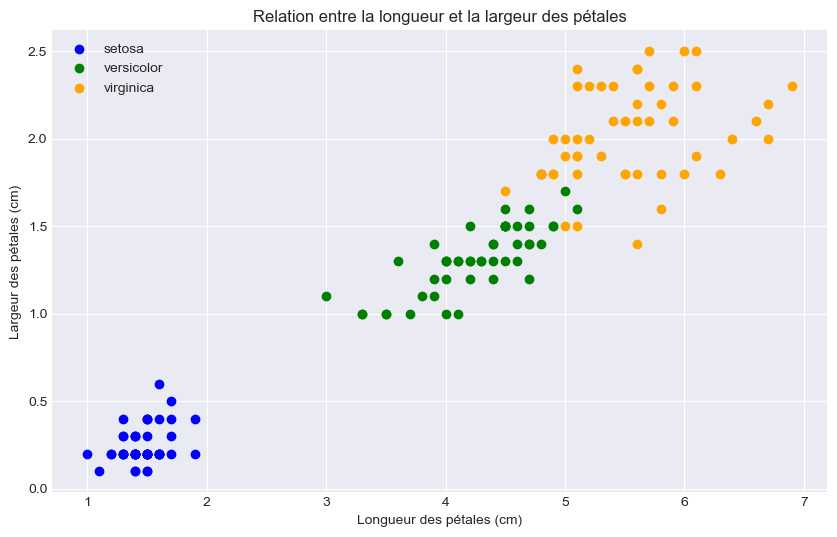

In [471]:
plt.figure(figsize=(10, 6))

for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'], label=species, color=species_colors[species])

plt.title('Relation entre la longueur et la largeur des pétales')
plt.xlabel('Longueur des pétales (cm)')
plt.ylabel('Largeur des pétales (cm)')
plt.legend()
plt.grid(True)
plt.show()


**4. Barres (Bar Plot) :**
Le bar plot est utilisé pour comparer des quantités entre différentes catégories.

<Figure size 1000x600 with 0 Axes>

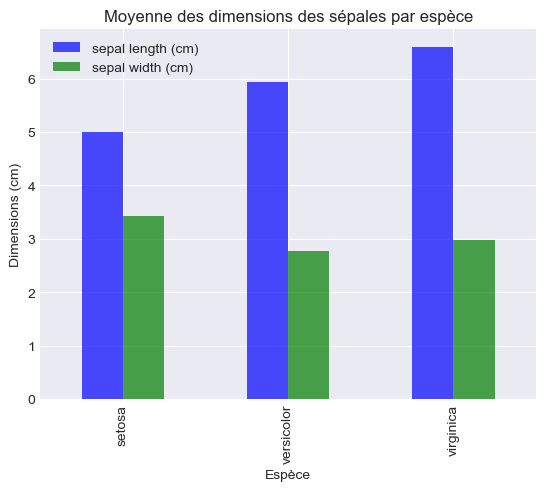

In [472]:
plt.figure(figsize=(10, 6))

mean_values = df.groupby('species').mean()
mean_values[['sepal length (cm)', 'sepal width (cm)']].plot(kind='bar', color=['blue', 'green', 'orange'], alpha=0.7)

plt.title('Moyenne des dimensions des sépales par espèce')
plt.xlabel('Espèce')
plt.ylabel('Dimensions (cm)')
plt.grid(True)
plt.show()


**5. Box Plot :**
Le box plot est utilisé pour montrer la distribution d'un ensemble de données en termes de quartiles, et pour identifier les valeurs aberrantes.

<Figure size 1000x600 with 0 Axes>

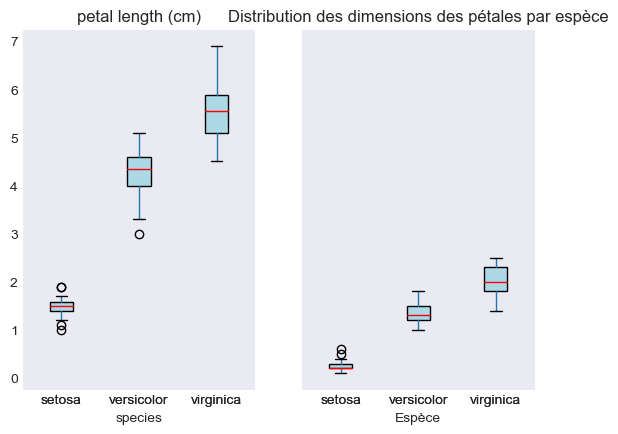

In [473]:
plt.figure(figsize=(10, 6))

df.boxplot(column=['petal length (cm)', 'petal width (cm)'], by='species', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))

plt.suptitle('')  # Supprimer le titre par défaut de boxplot
plt.title('Distribution des dimensions des pétales par espèce')
plt.xlabel('Espèce')
plt.ylabel('Dimensions (cm)')
plt.show()


## 4. Personnalisation des Graphiques

**Sauvegarde des Graphiques :**
Vous pouvez sauvegarder vos graphiques en différents formats (PNG, PDF, SVG, etc.).

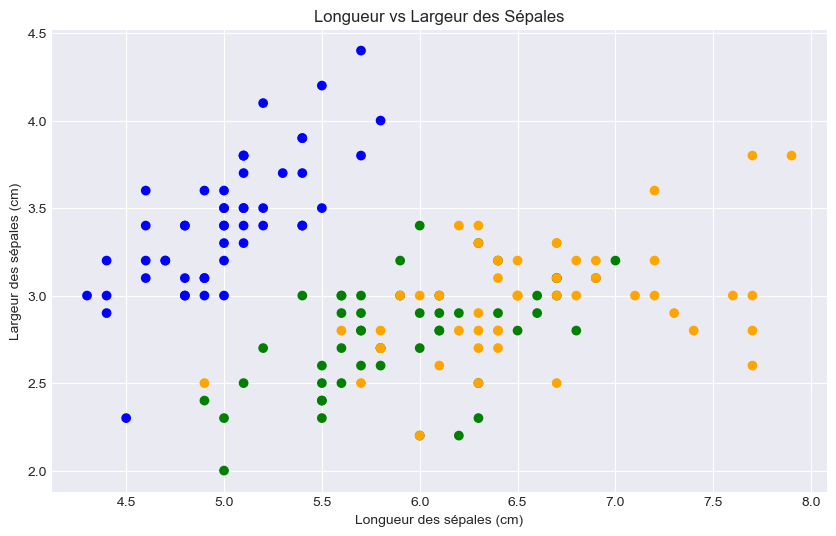

In [474]:
plt.figure(figsize=(10, 6))
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['species'].map(species_colors))
plt.title('Longueur vs Largeur des Sépales')
plt.xlabel('Longueur des sépales (cm)')
plt.ylabel('Largeur des sépales (cm)')
plt.grid(True)
plt.savefig('scatter_sepal_length_width.png', dpi=300)  # Sauvegarde en PNG avec haute résolution
plt.show()

## 5. Exercice : Visualisation Complète du Dataset Iris
* **Scatter Plot :** Créez un scatter plot pour chaque paire de caractéristiques (ex: longueur des sépales vs largeur des sépales, etc.), avec une couleur différente pour chaque espèce.
* **Histogrammes :** Créez un histogramme combiné pour la largeur des sépales par espèce.
* **Box Plot :** Créez un box plot montrant la distribution des longueurs des sépales pour chaque espèce.
* **Pair Plot :** Utilisez Seaborn pour générer un pair plot des quatre caractéristiques, colorié par espèce.

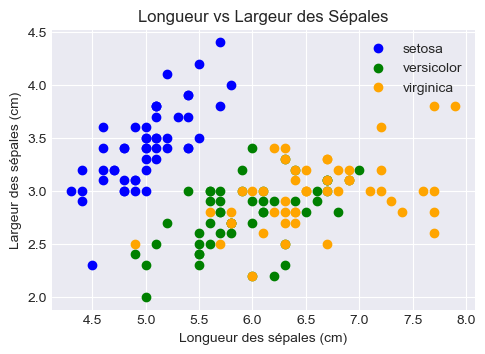

In [475]:
# Scatter Plot pour chaque paire de caractéristiques
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], label=species, color=species_colors[species])
plt.title('Longueur vs Largeur des Sépales')
plt.xlabel('Longueur des sépales (cm)')
plt.ylabel('Largeur des sépales (cm)')
plt.legend()

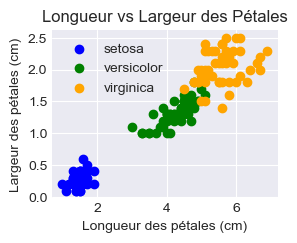

In [476]:
plt.subplot(2, 2, 2)
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'], label=species, color=species_colors[species])
plt.title('Longueur vs Largeur des Pétales')
plt.xlabel('Longueur des pétales (cm)')
plt.ylabel('Largeur des pétales (cm)')
plt.legend()

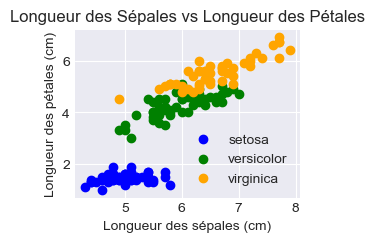

In [477]:
plt.subplot(2, 2, 3)
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['petal length (cm)'], label=species, color=species_colors[species])
plt.title('Longueur des Sépales vs Longueur des Pétales')
plt.xlabel('Longueur des sépales (cm)')
plt.ylabel('Longueur des pétales (cm)')
plt.legend()

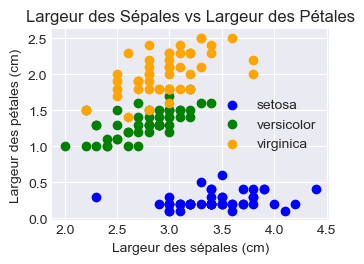

In [478]:
plt.subplot(2, 2, 4)
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal width (cm)'], subset['petal width (cm)'], label=species, color=species_colors[species])
plt.title('Largeur des Sépales vs Largeur des Pétales')
plt.xlabel('Largeur des sépales (cm)')
plt.ylabel('Largeur des pétales (cm)')
plt.legend()

plt.tight_layout()
plt.show()

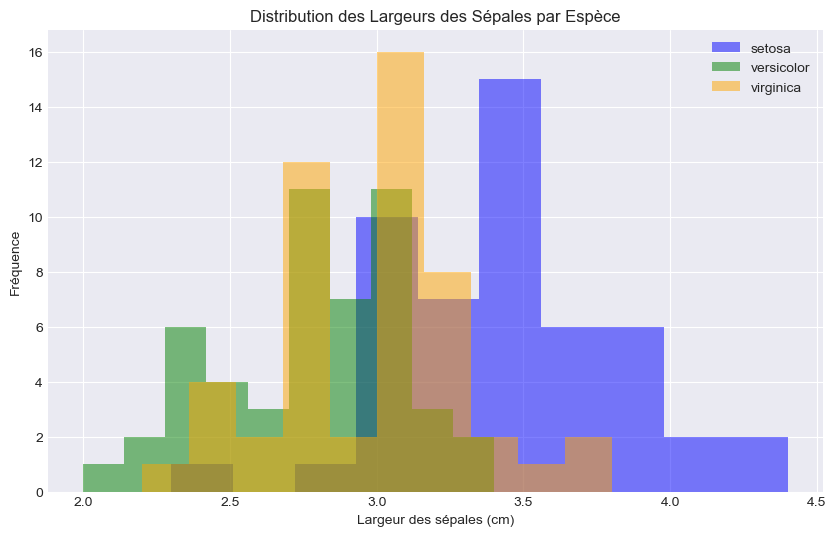

In [479]:
# Histogrammes pour la largeur des sépales par espèce
plt.figure(figsize=(10, 6))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.hist(subset['sepal width (cm)'], bins=10, alpha=0.5, label=species, color=species_colors[species])
plt.title('Distribution des Largeurs des Sépales par Espèce')
plt.xlabel('Largeur des sépales (cm)')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

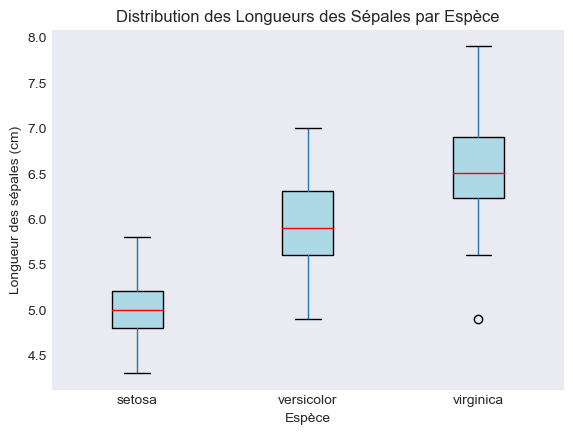

In [480]:
# Box Plot pour la longueur des sépales par espèce
plt.figure(figsize=(10, 6))
df.boxplot(column=['sepal length (cm)'], by='species', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))
plt.suptitle('')
plt.title('Distribution des Longueurs des Sépales par Espèce')
plt.xlabel('Espèce')
plt.ylabel('Longueur des sépales (cm)')
plt.show()

In [481]:
# Pair Plot
sns.pairplot(df, hue='species', palette=species_colors)
plt.suptitle('Pair Plot des Caractéristiques du Dataset Iris', y=1.02)
plt.show()

NameError: name 'sns' is not defined